In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [4]:
data['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [5]:
data['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [6]:
#fill missing value in precip type:
data['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [7]:
fill=data['Precip Type'].mode()[0]

In [8]:
data['Precip Type']=data['Precip Type'].fillna(fill)

In [9]:
# formatted date:
data['Formatted Date']=pd.to_datetime(data['Formatted Date'],utc=True)

In [10]:
data.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


In [11]:
#Make date an index so that we can do analysis of temp, humidity etc
data = data.set_index('Formatted Date')
data.tail(2)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2016-09-09 20:00:00+00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
2016-09-09 21:00:00+00:00,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [12]:
#Resampling of data as per hypothesis:
analysis_column=['Humidity','Apparent Temperature (C)']
monthly_data=data[analysis_column].resample('MS').mean()

In [13]:
monthly_data.head(2)

,Humidity,Apparent Temperature (C)
Formatted Date,,
2005-12-01 00:00:00+00:00,0.89000,-4.050000
2006-01-01 00:00:00+00:00,0.83461,-4.173708


In [14]:
#Check analysis of humidity by plot;

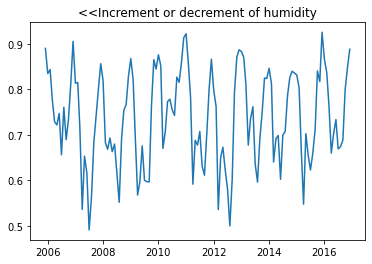

In [15]:
plt.plot(monthly_data['Humidity'])
plt.title('<<Increment or decrement of humidity')
plt.show()

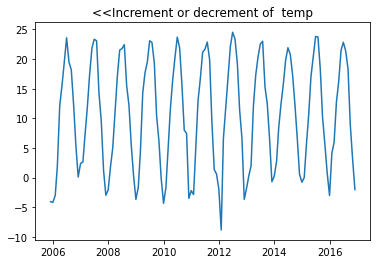

In [16]:
#analysis of temperature by plot;
plt.plot(monthly_data['Apparent Temperature (C)'])
plt.title('<<Increment or decrement of  temp')
plt.show()

Text(0.5, 1.0, 'Humidity and temperature of all months')

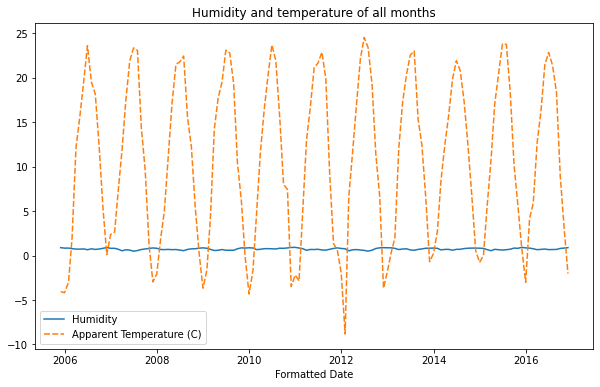

In [17]:
# Checking both humidity and temp.
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_data)
plt.title('Humidity and temperature of all months')

In [18]:
# So by this analysis we can say that our Humidity is same but  Apparent temperature Fluctuates;
#In year of 2013 we can see that it falls around -10.

In [19]:
monthly_data.index.month

Int64Index([12,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', name='Formatted Date', length=133)

In [20]:
monthly=monthly_data[monthly_data.index.month==4]
monthly.head(1)

,Humidity,Apparent Temperature (C)
Formatted Date,,
2006-04-01 00:00:00+00:00,0.728625,12.098827


In [21]:
#Retrive April data for hypothesis:

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

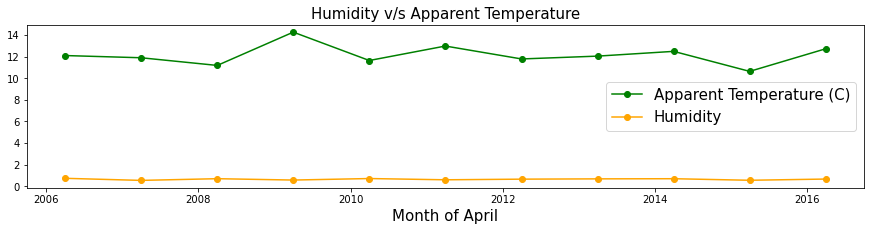

In [23]:
plt.figure(figsize=(15,3))
plt.plot(monthly.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(monthly.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('Month of April', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

In [ ]:
#Conclusion:
#Increase in average apparent temperature can be seen in the year 2009 then again it dropped in 2010 , then a slight increase in 2011 then a significant drop is observed in 2015 and again it increased in 2016
#Same in Humidity(No fluctuation)